<a href="https://colab.research.google.com/github/Adarshthakur-850/chess-game-winner/blob/main/chess_game_winning_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

data = pd.read_csv("/content/chess_games.csv")
data.head()


,game_id,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,opening_variation
0,1,False,13,Out of Time,White,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,5,Slav Defense: Exchange Variation,Slav Defense,NaN,Exchange Variation
1,2,True,16,Resign,Black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,4,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense,NaN,Kennedy Variation
2,3,True,61,Mate,White,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,3,King's Pawn Game: Leonardis Variation,King's Pawn Game,NaN,Leonardis Variation
3,4,True,61,Mate,White,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,3,Queen's Pawn Game: Zukertort Variation,Queen's Pawn Game,NaN,Zukertort Variation
4,5,True,95,Mate,White,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,5,Philidor Defense,Philidor Defense,NaN,NaN


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=data)

https://docs.google.com/spreadsheets/d/1nr4LzDvMmhurm1Bck0awtqa2q8lQi-TYo4i4B5JcqXI#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


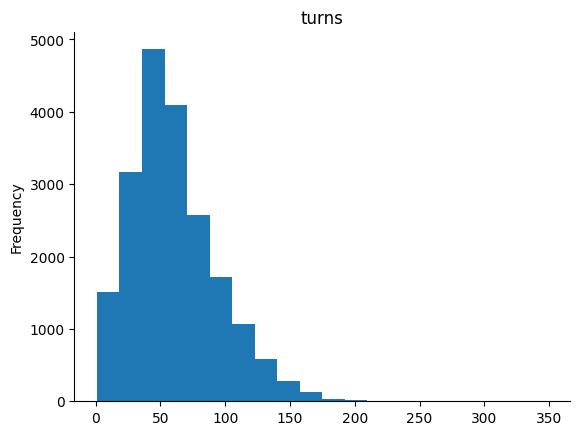

In [ ]:
# @title turns

from matplotlib import pyplot as plt
data['turns'].plot(kind='hist', bins=20, title='turns')
plt.gca().spines[['top', 'right',]].set_visible(False)

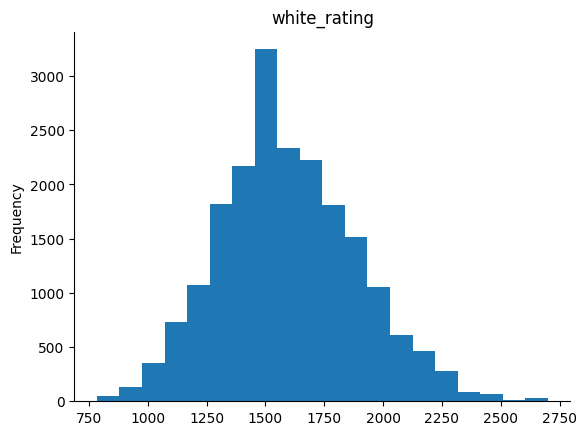

In [ ]:
# @title white_rating

from matplotlib import pyplot as plt
data['white_rating'].plot(kind='hist', bins=20, title='white_rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

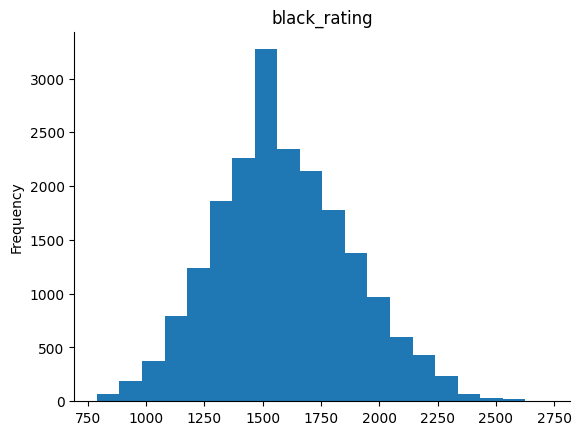

In [ ]:
# @title black_rating

from matplotlib import pyplot as plt
data['black_rating'].plot(kind='hist', bins=20, title='black_rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

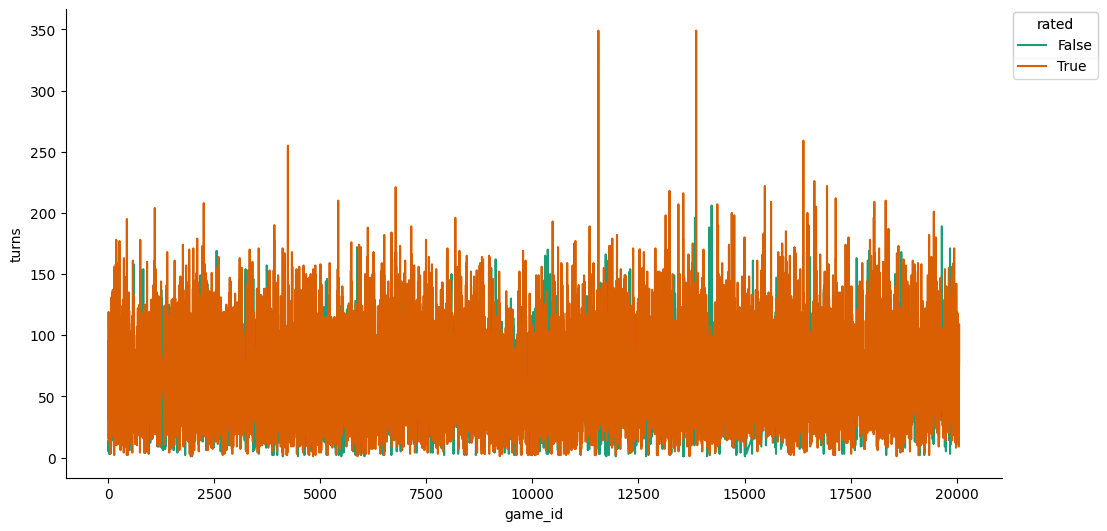

In [ ]:
# @title game_id vs turns

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['game_id']
  ys = series['turns']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('game_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('rated')):
  _plot_series(series, series_name, i)
  fig.legend(title='rated', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('game_id')
_ = plt.ylabel('turns')

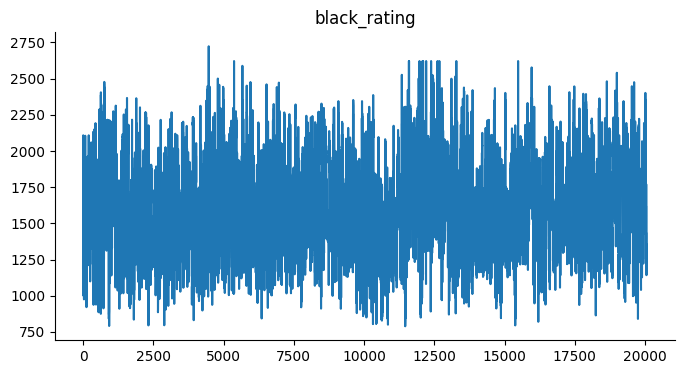

In [ ]:
# @title black_rating

from matplotlib import pyplot as plt
data['black_rating'].plot(kind='line', figsize=(8, 4), title='black_rating')
plt.gca().spines[['top', 'right']].set_visible(False)

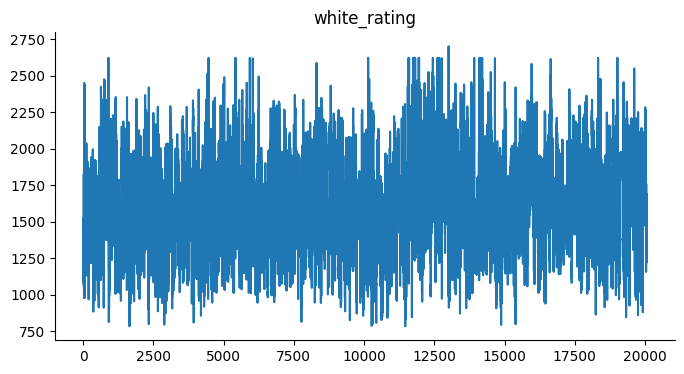

In [ ]:
# @title white_rating

from matplotlib import pyplot as plt
data['white_rating'].plot(kind='line', figsize=(8, 4), title='white_rating')
plt.gca().spines[['top', 'right']].set_visible(False)

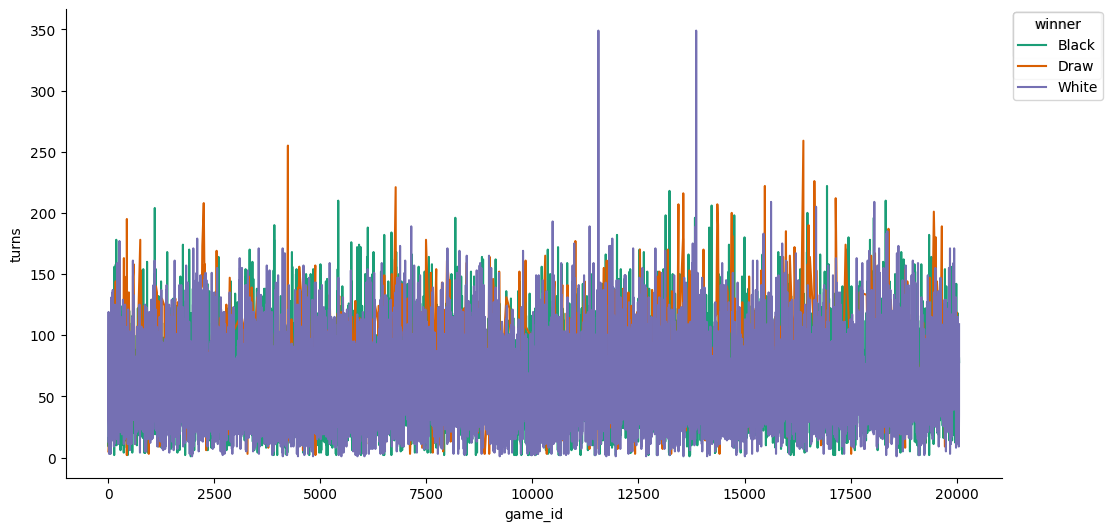

In [ ]:
# @title game_id vs turns

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['game_id']
  ys = series['turns']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('game_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('winner')):
  _plot_series(series, series_name, i)
  fig.legend(title='winner', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('game_id')
_ = plt.ylabel('turns')

In [ ]:
data.tail()


,game_id,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,opening_variation
20053,20054,True,24,Resign,White,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,2,Dutch Defense,Dutch Defense,NaN,NaN
20054,20055,True,82,Mate,Black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,2,Queen's Pawn,Queen's Pawn,NaN,NaN
20055,20056,True,35,Mate,White,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,3,Queen's Pawn Game: Mason Attack,Queen's Pawn Game,NaN,Mason Attack
20056,20057,True,109,Resign,White,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,4,Pirc Defense,Pirc Defense,NaN,NaN
20057,20058,True,78,Mate,Black,10+0,jamboger,1235,ffbob,1339,d4 d5 Bf4 Na6 e3 e6 c3 Nf6 Nf3 Bd7 Nbd2 b5 Bd3...,D00,3,Queen's Pawn Game: Mason Attack,Queen's Pawn Game,NaN,Mason Attack


In [ ]:
x=data.iloc[:,1:5].values
y=data.iloc[:,5].values

In [ ]:
x

array([[False, 13, 'Out of Time', 'White'],
       [True, 16, 'Resign', 'Black'],
       [True, 61, 'Mate', 'White'],
       ...,
       [True, 35, 'Mate', 'White'],
       [True, 109, 'Resign', 'White'],
       [True, 78, 'Mate', 'Black']], dtype=object)

In [ ]:
y


array(['15+2', '5+10', '5+10', ..., '10+0', '10+0', '10+0'], dtype=object)

In [ ]:
#split the data into training and testing
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size = 0.80, random_state = 3)


In [ ]:
xtrain

array([[False, 36, 'Mate', 'Black'],
       [True, 33, 'Resign', 'White'],
       [True, 73, 'Mate', 'White'],
       ...,
       [True, 88, 'Mate', 'Black'],
       [False, 39, 'Resign', 'White'],
       [False, 72, 'Resign', 'White']], dtype=object)

In [ ]:
ytrain

array(['45+45', '15+5', '10+15', ..., '15+0', '5+5', '10+0'], dtype=object)

In [ ]:
xtest

array([[False, 41, 'Resign', 'White'],
       [True, 60, 'Mate', 'Black'],
       [True, 43, 'Resign', 'White'],
       ...,
       [True, 103, 'Resign', 'White'],
       [True, 56, 'Resign', 'Black'],
       [True, 76, 'Mate', 'Black']], dtype=object)

In [ ]:
ytest

array(['15+10', '10+3', '15+15', ..., '10+0', '10+0', '10+0'],
      dtype=object)

             Clustering Algorithms

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

file_path = r'/mnt/data/chess_games.csv'

try:
    chess_data = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"location: File  found at {file_path}. Please check the path and file name.")

location: File  found at /mnt/data/chess_games.csv. Please check the path and file name.


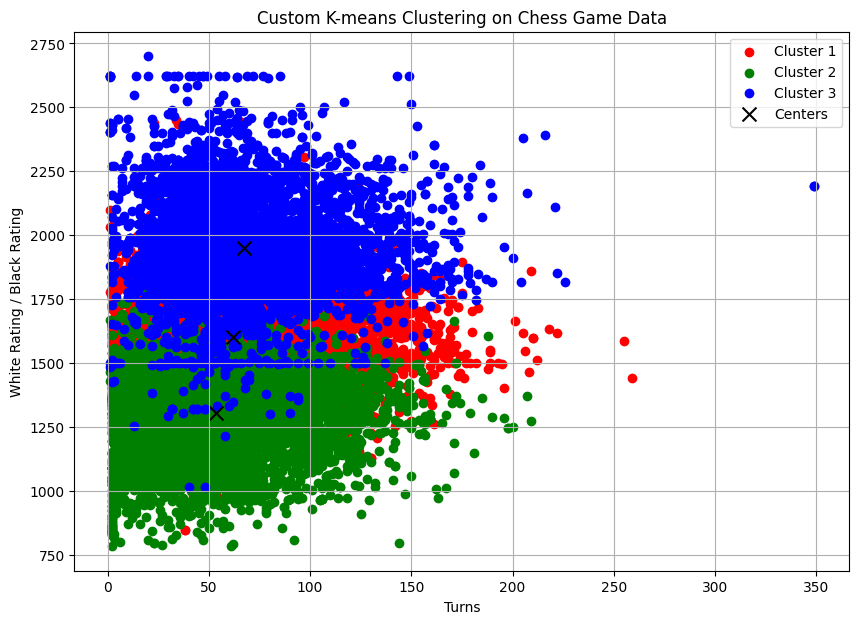

In [ ]:
# @title K-Means Clustering:

points = chess_data[['turns', 'white_rating', 'black_rating']].dropna().values
initial_centers = np.array([points[0], points[1], points[2]])

def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

def assign_clusters(points, centers):
    clusters = []
    for point in points:
        distances = [euclidean_distance(point, center) for center in centers]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return clusters

def update_centers(points, clusters, k):
    new_centers = []
    for i in range(k):
        cluster_points = points[np.array(clusters) == i]
        if len(cluster_points) > 0:
            new_center = cluster_points.mean(axis=0)
        else:
            new_center = initial_centers[i]
        new_centers.append(new_center)
    return np.array(new_centers)

def has_converged(old_centers, new_centers):
    return np.array_equal(old_centers, new_centers)

k = 3

def kmeans(points, initial_centers, k):
    centers = initial_centers
    clusters = assign_clusters(points, centers)
    converged = False
    while not converged:
        new_centers = update_centers(points, clusters, k)
        converged = has_converged(centers, new_centers)
        centers = new_centers
        clusters = assign_clusters(points, centers)
    return centers, clusters

final_centers, final_clusters = kmeans(points, initial_centers, k)

colors = ['r', 'g', 'b']
plt.figure(figsize=(10, 7))
for i in range(k):
    cluster_points = points[np.array(final_clusters) == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i+1}')
plt.scatter(final_centers[:, 0], final_centers[:, 1], c='black', marker='x', s=100, label='Centers')
plt.title('Custom K-means Clustering on Chess Game Data')
plt.xlabel('Turns')
plt.ylabel('White Rating / Black Rating')
plt.legend()
plt.grid(True)
plt.show()


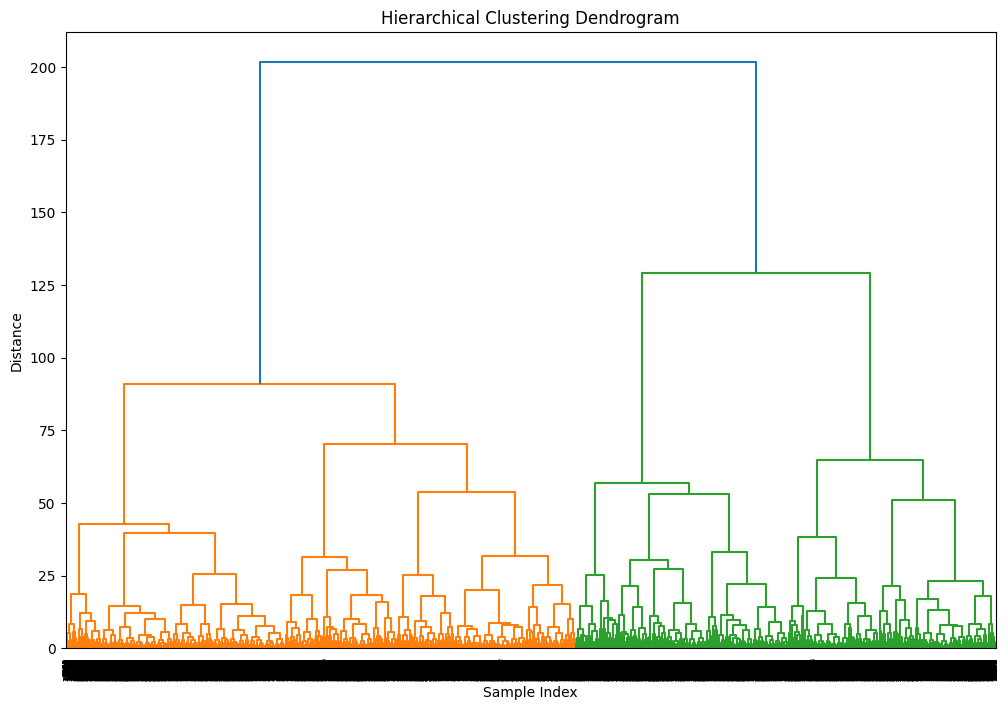

In [ ]:
# @title Hierarchical Algorithms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler


points = chess_data[['turns', 'white_rating', 'black_rating']].dropna().values
scaler = StandardScaler()
points_scaled = scaler.fit_transform(points)

Z = linkage(points_scaled, method='ward')

plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


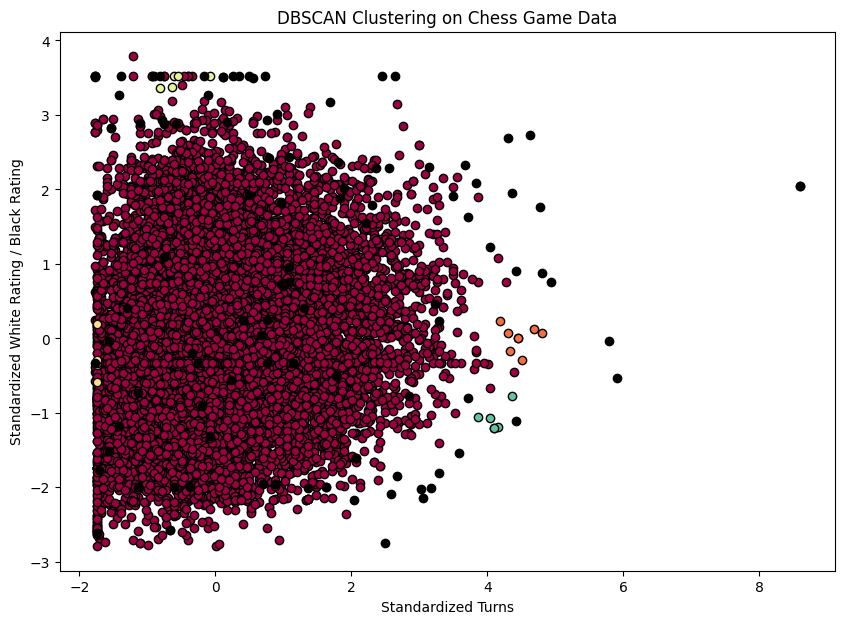

In [ ]:
# @title DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


file_path = 'chess_games.csv'

try:
    chess_data = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the path and file name.")
    raise

X = chess_data[['turns', 'white_rating', 'black_rating']].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(10, 7))
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    xy = X_scaled[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clustering on Chess Game Data')
plt.xlabel('Standardized Turns')
plt.ylabel('Standardized White Rating / Black Rating')
plt.show()

        Dimensionality Reduction Algorithms

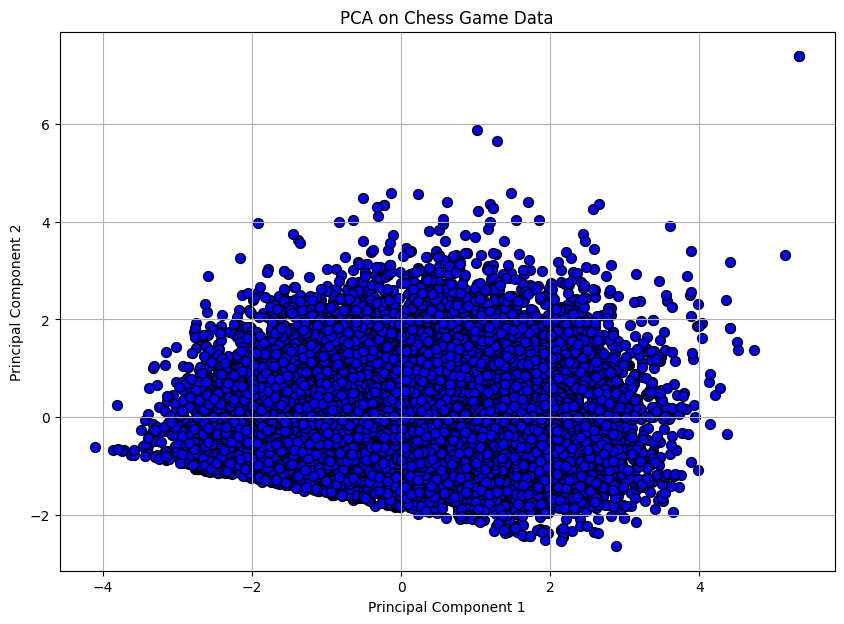

In [ ]:
# @title   PCA


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



try:
    chess_data = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the path and file name.")
    raise

X = chess_data[['turns', 'white_rating', 'black_rating']].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])

plt.figure(figsize=(10, 7))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='b', edgecolor='k', s=50)
plt.title('PCA on Chess Game Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()


627/627 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


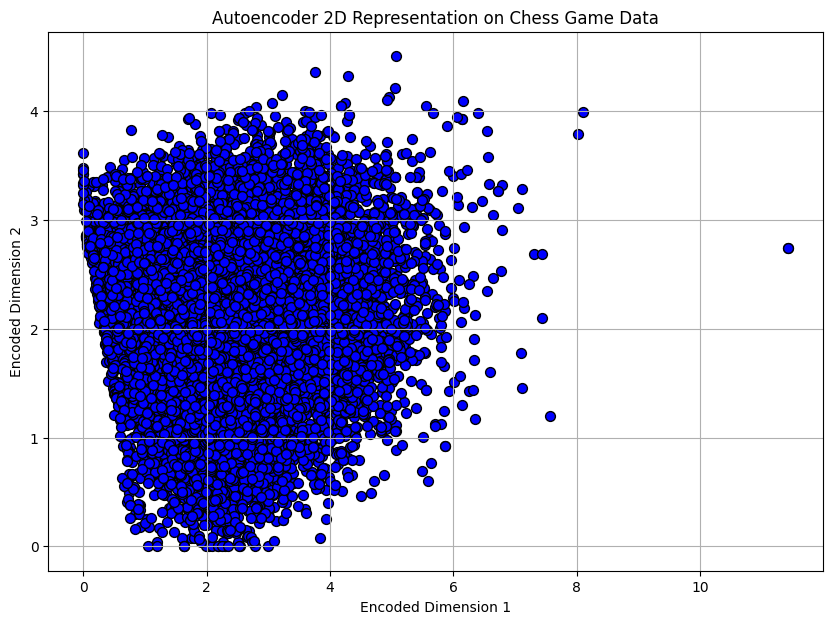

In [ ]:
# @title    Autoencoders


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam


try:
    chess_data = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the path and file name.")
    raise

X = chess_data[['turns', 'white_rating', 'black_rating']].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

input_dim = X_scaled.shape[1]
encoding_dim = 2
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)

decoded = Dense(input_dim, activation='linear')(encoded)

autoencoder = Model(input_layer, decoded)

autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

autoencoder.fit(X_scaled, X_scaled, epochs=100, batch_size=32, shuffle=True, verbose=0)

encoder = Model(input_layer, encoded)
encoded_data = encoder.predict(X_scaled)

encoded_df = pd.DataFrame(encoded_data, columns=['Encoded1', 'Encoded2'])

plt.figure(figsize=(10, 7))
plt.scatter(encoded_df['Encoded1'], encoded_df['Encoded2'], c='b', edgecolor='k', s=50)
plt.title('Autoencoder 2D Representation on Chess Game Data')
plt.xlabel('Encoded Dimension 1')
plt.ylabel('Encoded Dimension 2')
plt.grid()
plt.show()


           Association Rule Mining

In [ ]:
!pip install pyfpgrowth

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyfpgrowth: filename=pyfpgrowth-1.0-py2.py3-none-any.whl size=5489 sha256=e4540f8df562bceaa7ad155894281da3758b4ad7c8b74008052ded772eef424f
  Stored in directory: /root/.cache/pip/wheels/09/fc/dc/afff211038bfc745722d8d7e846e854e5791968b22c570a530
Successfully built pyfpgrowth


In [ ]:
#  @title    FP-Growth (Frequent Pattern Growth):


import pandas as pd
import pyfpgrowth

file_path = 'chess_games.csv'

try:
    chess_data = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the path and file name.")
    raise

print(chess_data.columns)
try:
    transactions = chess_data[['winner', 'turns']].dropna().values.tolist()
except KeyError as e:
    print(f"Error: Column not found - {e}")
    raise


transactions = [[str(item) for item in row] for row in transactions]

min_support = 20
patterns = pyfpgrowth.find_frequent_patterns(transactions, min_support)

if patterns:
    print("Frequent Patterns with Support Counts:")
    for pattern, support in patterns.items():
        print(f"{pattern}: {support}")
else:
    print("No frequent patterns found with the specified support level.")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['game_id', 'rated', 'turns', 'victory_status', 'winner',
       'time_increment', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_code', 'opening_moves',
       'opening_fullname', 'opening_shortname', 'opening_response',
       'opening_variation'],
      dtype='object')
Frequent Patterns with Support Counts:
('154',): 20
('140',): 20
('133',): 21
('139',): 21
('150',): 22
('142',): 23
('142', 'Black'): 20
('144',): 24
('136',): 24
('141',): 26
('141', 'White'): 22
('134',): 26
('134', 'Black'): 22
('131',): 29
('131', 'White'): 24
('138',): 29
('138', 'Black'): 22
('135',): 32
('135', 'White'): 22
('137',): 32
('137', 'White'): 23
('127',): 32
('127', 'White'): 25
('6',): 35
('6', 'Black'): 26
('132',): 35
('132', 'Black'): 30
('125',): 36
('125', 'White'): 28
('126',): 36
('126', 'Black'): 30
('129',): 38
('129', 'White'): 30
('121',): 38
('121', 'White'): 34
('128',): 38
('128', 'Black'): 29
('130',): 39
('130', 'Black'): 28
('5',): 40
('5', 

           Anomaly Detection Algorithms

In [ ]:
# @title Anomaly Detection Algorithms

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


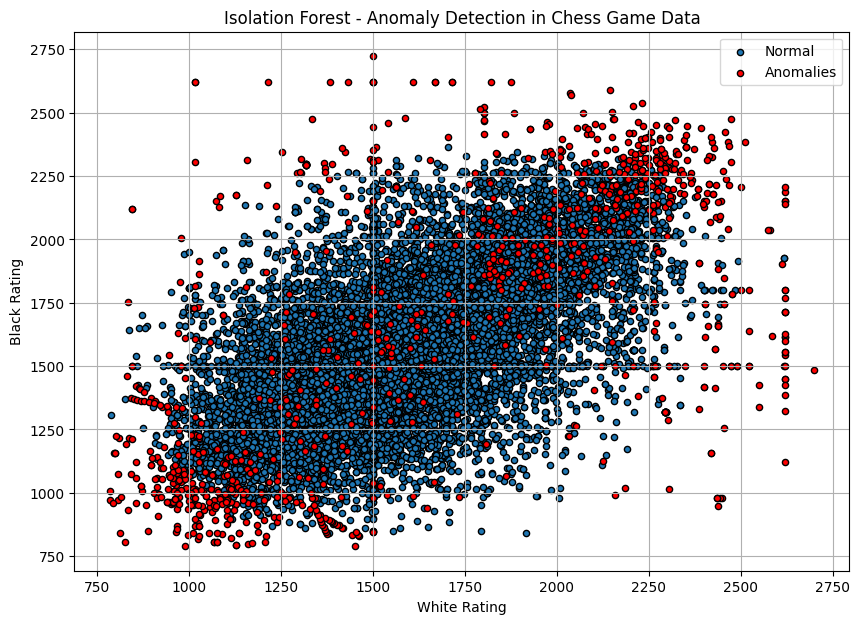

In [ ]:
# @title Isolation Forest

import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

file_path = 'chess_games.csv'

try:
    chess_data = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the path and file name.")
    raise

columns_to_use = ['turns', 'white_rating', 'black_rating']
try:
    data = chess_data[columns_to_use].dropna()
except KeyError as e:
    print(f"Error: Column not found - {e}")
    raise

iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(data)
data['anomaly'] = outliers

normal_data = data[data['anomaly'] == 1]
anomalies = data[data['anomaly'] == -1]

plt.figure(figsize=(10, 7))
plt.scatter(normal_data['white_rating'], normal_data['black_rating'], label="Normal", edgecolor='k', s=20)
plt.scatter(anomalies['white_rating'], anomalies['black_rating'], color='r', label="Anomalies", edgecolor='k', s=20)
plt.xlabel("White Rating")
plt.ylabel("Black Rating")
plt.legend()
plt.title("Isolation Forest - Anomaly Detection in Chess Game Data")
plt.grid()
plt.show()


          Graph-Based Algorithms

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


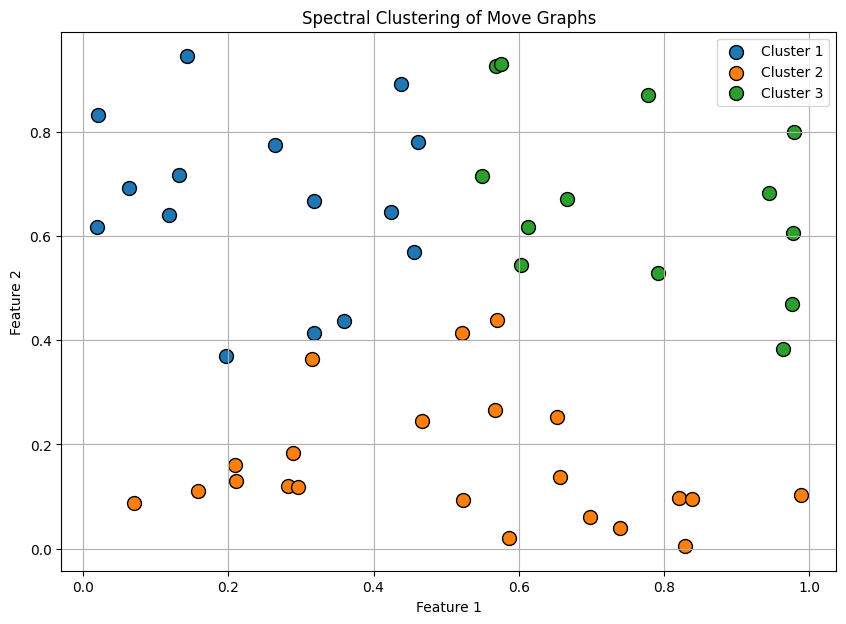

In [ ]:



# @title Spectral Clustering on Move Graphs

import pandas as pd
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
np.random.seed(0)
n_moves = 50
n_features = 2
data = np.random.rand(n_moves, n_features)

columns_to_use = ['Feature_1', 'Feature_2']
move_data = pd.DataFrame(data, columns=columns_to_use)

dist_matrix = pairwise_distances(move_data)

sigma = 0.5
affinity_matrix = np.exp(-dist_matrix**2 / (2 * sigma**2))

n_clusters = 3
spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', random_state=42)
labels = spectral_clustering.fit_predict(affinity_matrix)

move_data['Cluster'] = labels

plt.figure(figsize=(10, 7))
for i in range(n_clusters):
    cluster_data = move_data[move_data['Cluster'] == i]
    plt.scatter(cluster_data['Feature_1'], cluster_data['Feature_2'], label=f'Cluster {i + 1}', edgecolor='k', s=100)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Spectral Clustering of Move Graphs")
plt.legend()
plt.grid()
plt.show()


        Q-Learning

In [ ]:
import numpy as np
import pandas as pd

data = pd.DataFrame(data, columns=['white_rating', 'black_rating']) # Assuming these are the correct column names

chess_data = pd.read_csv('chess_games.csv')

data = pd.merge(data, chess_data[['white_rating', 'black_rating', 'opening_shortname', 'winner']], on=['white_rating', 'black_rating'], how='inner')

data['state'] = list(zip(data['white_rating'], data['black_rating'], data['opening_shortname']))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

chess_data['state'] = list(zip(chess_data['white_rating'], chess_data['black_rating'], chess_data['opening_shortname']))


actions = chess_data['opening_shortname'].unique()
action_indices = {action: idx for idx, action in enumerate(actions)}


Q_table = pd.DataFrame(
    data=0,
    index=pd.MultiIndex.from_tuples(chess_data['state'].unique(), names=["white_rating", "black_rating", "opening_shortname"]),
    columns=actions
)

for index, row in chess_data.iterrows():
    state = row['state']
    action = row['opening_shortname']
    winner = row['winner']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
